In [1]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from src.MLE import MLE
import os

In [2]:
# define the function to draw the main figure (the increasing temporal trend of LLM usage in scientific paper abstracts)
def draw(data_with_ci):
    # define the time range for drawing the figure
    start_year = 2021
    end_year = 2024
    start_month = 1
    end_month = 9
    months_count = (end_year - start_year) * 12 + (end_month - start_month + 1)
    time_points = [2021.0 + i / 12 for i in range(months_count)]
        
    # define the colors for the each venue
    colors = {
        'Computer Science(arXiv)': '#d7191c',
        'Electrical Engineering and Systems Science(arXiv)': '#ff7f0e',
        'Mathematics(arXiv)': '#8c564b',
        'Physics(arXiv)': '#2b83ba',
        'Statistics(arXiv)': '#abdda4',
        'bioRxiv': '#9467bd',
        'Nature Portfolio': '#bcbd22'
    }
        
    # parameters for the figure
    plt.rcParams.update({'font.size': 20, 'font.family': 'arial'})
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.set_xlim([2020.92, 2024.72])
    ax.set_ylim([0, 25])
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax.set_ylabel('Estimated Alpha')
    # format the y-axis to be percentage
    def to_percent(y, position):
        return f"{y}%"
    formatter = FuncFormatter(to_percent)
    ax.yaxis.set_major_formatter(formatter)
    # add a vertical line at the date of ChatGPT launch
    ax.axvline(x=11/12 + 2022 -1/24, color='darkred', linestyle='--', linewidth=1)
    ax.text(11/12 + 2022 - 0.1, ax.get_ylim()[1]*0.50, "ChatGPT\nLaunch\nNov 30, 2022", color='darkred', horizontalalignment='right', verticalalignment='top')
    
    # define the labels for the x-axis (2021.1 - 2024.9)
    x_tick_positions = time_points
    x_tick_labels = [
        f"{year}.{month}" 
        for year in range(2021, 2025) 
        for month in range(1, 13)
    ][:((2024-2021)*12 + 9)]
    # reduce the number of labels for the x-axis
    x_tick_positions = x_tick_positions[::3]+[x_tick_positions[-1]]
    x_tick_labels = x_tick_labels[::3]+[x_tick_labels[-1]]
    # draw the x-axis labels
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels, rotation=20, fontsize=18)
    
    
    # draw the error bars for the each venue
    for conference, data in data_with_ci.items():
        years = time_points
        # convert raw data to percentage
        alphas = [value[0]*100 for value in data]
        cis = [value[1]*100 for value in data]
        ax.errorbar(years, alphas, yerr=cis, fmt='-o', label=conference, markersize=8, capsize=8, elinewidth=0.5, markeredgewidth=0.5, color=colors[conference], alpha=1, linewidth=1)

    # display the figure
    ax.legend(loc='best', fontsize=18)
    sns.despine(right=True, top=True)
    plt.tight_layout()
    plt.show()

In [3]:
# Define the paths to the test datasets for each venue, in the format of year_month.parquet
test_paths = {
    'Computer Science(arXiv)': 'data/inference_data/arxiv/CS',
    'Electrical Engineering and Systems Science(arXiv)': 'data/inference_data/arxiv/EESS',
    'Mathematics(arXiv)': 'data/inference_data/arxiv/Math',
    'Physics(arXiv)': 'data/inference_data/arxiv/Phys',
    'Statistics(arXiv)': 'data/inference_data/arxiv/Stat',
    'bioRxiv': 'data/inference_data/biorxiv',
    'Nature Portfolio': 'data/inference_data/nature'
}

# Define the paths to the pre-computed word occurrences frequency files for each venue
model_paths = {
    'Computer Science(arXiv)': 'distribution/CS.parquet',
    'Electrical Engineering and Systems Science(arXiv)': 'distribution/EESS.parquet',
    'Mathematics(arXiv)': 'distribution/Math.parquet',
    'Physics(arXiv)': 'distribution/Phys.parquet',
    'Statistics(arXiv)': 'distribution/Stat.parquet',
    'bioRxiv': 'distribution/bioRxiv.parquet',
    'Nature Portfolio': 'distribution/nature.parquet'
}

# Initialize a dictionary to store results for plotting
draw_dict = {
    'Computer Science(arXiv)': [],
    'Electrical Engineering and Systems Science(arXiv)': [],
    'Mathematics(arXiv)': [],
    'Physics(arXiv)': [],
    'Statistics(arXiv)': [],
    'bioRxiv': [],
    'Nature Portfolio': []
}

In [4]:
# iterate over the research paper venues (arXiv, biorxiv, nature), the estimated complete time for whole process is 15-20 min
for key,value in model_paths.items():
    # load the word occurrences frequency into our framework
    model = MLE(value)
    # iterate over the years and months to get the alpha and ci
    for year in range(2021, 2025):
        for month in range(1, 13):
            path = f'{test_paths[key]}/{year}_{month}.parquet'
            if os.path.exists(path):
                # the inference time for each venue, each month is approximately 5-10 seconds
                alpha,ci=model.inference(path)
                draw_dict[key].append((alpha,ci))
    print(f"temporal trend estimation for {key} completed")

temporal trend estimation for Computer Science(arXiv) completed
temporal trend estimation for Electrical Engineering and Systems Science(arXiv) completed
temporal trend estimation for Mathematics(arXiv) completed
temporal trend estimation for Physics(arXiv) completed
temporal trend estimation for Statistics(arXiv) completed
temporal trend estimation for bioRxiv completed
temporal trend estimation for Nature Portfolio completed


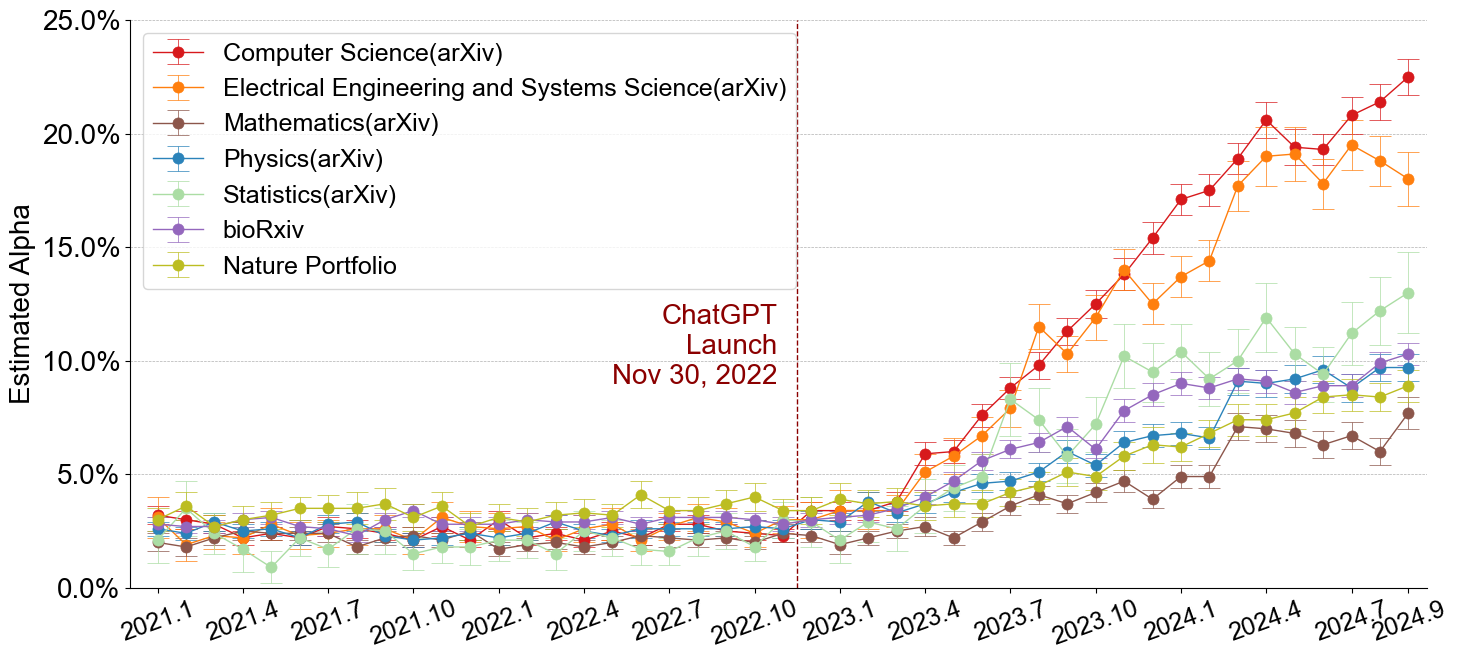

In [5]:
draw(draw_dict)